In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import math
import os

In [8]:
data_in = pd.read_csv('data/test_data/program_validation_0405_home_test_long.csv')
data_in = data_in.reset_index()


In [9]:
data_color_changed = data_in[data_in['event_type'] == 'color changed at']
indices_color_changed = data_color_changed['index'].tolist()
data_color_changed = data_color_changed.reset_index()

data_got_color = data_in[data_in['event_type'] == 'got color at']

data_got_color

,index,event_type,timestamp
0,0,got color at,1281232664
1,1,got color at,1281249581
2,2,got color at,1281266283
3,3,got color at,1281282955
4,4,got color at,1281301306
...,...,...,...
313,313,got color at,1286259289
314,314,got color at,1286272250
316,316,got color at,1286295188
317,317,got color at,1286317131


In [10]:
data_color_changed

,level_0,index,event_type,timestamp
0,186,186,color changed at,1284349267
1,197,197,color changed at,1284516819
2,210,210,color changed at,1284708570
3,224,224,color changed at,1284908876
4,238,238,color changed at,1285109162
5,252,252,color changed at,1285308816
6,266,266,color changed at,1285508286
7,280,280,color changed at,1285708785
8,294,294,color changed at,1285909213
9,309,309,color changed at,1286173960


In [5]:


data_got_color['color_value'] = -1
for index, row in data_got_color.iterrows():
    for i in range (0, len(indices_color_changed)):
        if index > indices_color_changed[i]:
            data_got_color.loc[index, 'color_value'] = i
data_color_changed

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_6340\503007926.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_got_color['color_value'] = -1


,level_0,index,event_type,timestamp
0,186,186,color changed at,1284349267
1,197,197,color changed at,1284516819
2,210,210,color changed at,1284708570
3,224,224,color changed at,1284908876
4,238,238,color changed at,1285109162
5,252,252,color changed at,1285308816
6,266,266,color changed at,1285508286
7,280,280,color changed at,1285708785
8,294,294,color changed at,1285909213
9,309,309,color changed at,1286173960


In [6]:
data_got_color

,index,event_type,timestamp,color_value
0,0,got color at,1281232664,-1
1,1,got color at,1281249581,-1
2,2,got color at,1281266283,-1
3,3,got color at,1281282955,-1
4,4,got color at,1281301306,-1
...,...,...,...,...
313,313,got color at,1286259289,10
314,314,got color at,1286272250,10
316,316,got color at,1286295188,11
317,317,got color at,1286317131,11


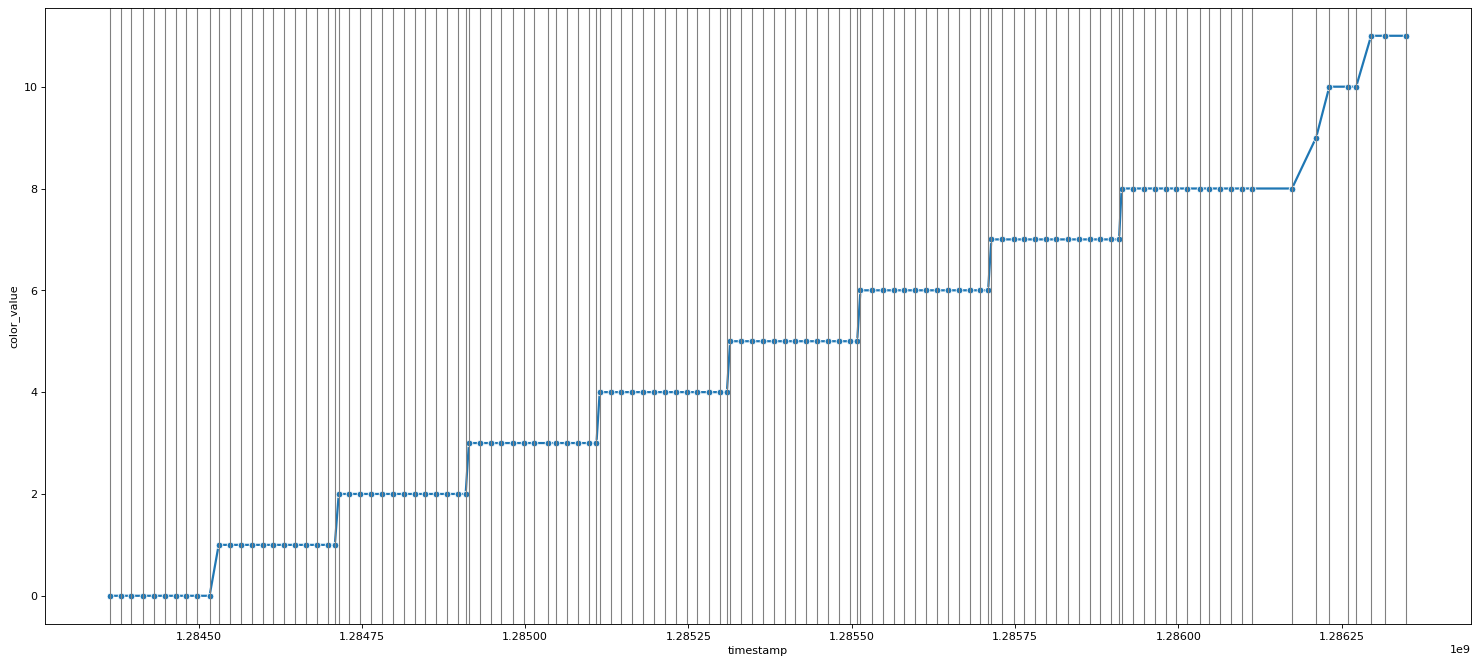

In [287]:

plt.figure(figsize=(23, 10), dpi=80)
ax = plt.gca()

plot = sns.lineplot(data=data_got_color[data_got_color['color_value'] > -1], x='timestamp', y='color_value', marker='o', linewidth='2')

for value in data_got_color[data_got_color['color_value'] > -1]['timestamp']:
    ax.axvline(value, color='grey', linewidth='1')


In [9]:
data_in_app = pd.read_csv('data/setup_test_windup_app.csv')
# data_in_app = data_in_app.reset_index()
data_in_app

,event_type,color_value,timestamp
0,start,-1,1848731559
1,render_start,0,1848731683
2,render_stop,0,1848731749
3,render_start,1,1848931559
4,render_stop,1,1848931622
5,render_start,2,1849131559
6,render_stop,2,1849131620
7,render_start,3,1849331559
8,render_stop,3,1849331621
9,render_start,4,1849531559


In [3]:
PATH_GETPIXEL = 'data/program_validation_0405_home_test_render_info_new_program_getpixel_program.csv'
PATH_BITBLT = 'data/program_validation_0405_home_test_bitblt_vsync_program.csv'
PATH_GETDBITS = 'data/program_validation_0405_home_test_render_info_new_program_getdbits_program.csv'

In [12]:
path = 'data/setup_test_windup_program.csv'

In [13]:
data_in = pd.read_csv(path)
data_in

,event_type,timestamp,color_equal
0,got color at,1846003245,1
1,got color at,1846004667,1
2,got color at,1848743466,1
3,got color at,1848935348,0
4,got color at,1849135797,0
...,...,...,...
217592,got color at,1850933110,1
217593,got color at,1850933123,1
217594,got color at,1850933136,1
217595,got color at,1850933148,1


In [14]:
data_in['color_value'] = -1

increment_counter = 0
for index, row in data_in.iterrows():
    data_in.at[index, 'color_value'] += increment_counter
    if row['color_equal'] == 0:
        increment_counter += 1

data_in

,event_type,timestamp,color_equal,color_value
0,got color at,1846003245,1,-1
1,got color at,1846004667,1,-1
2,got color at,1848743466,1,-1
3,got color at,1848935348,0,-1
4,got color at,1849135797,0,0
...,...,...,...,...
217592,got color at,1850933110,1,1
217593,got color at,1850933123,1,1
217594,got color at,1850933136,1,1
217595,got color at,1850933148,1,1


In [15]:
def increment_cell(row):
    if row['color_equal'] == 0: 
        return row['color_value'] + 1 
    else:
        return row['color_value'] 

data_in['color_value'] = data_in.apply(increment_cell, axis=1)
data_in

,event_type,timestamp,color_equal,color_value
0,got color at,1846003245,1,-1
1,got color at,1846004667,1,-1
2,got color at,1848743466,1,-1
3,got color at,1848935348,0,0
4,got color at,1849135797,0,1
...,...,...,...,...
217592,got color at,1850933110,1,1
217593,got color at,1850933123,1,1
217594,got color at,1850933136,1,1
217595,got color at,1850933148,1,1


<Axes: xlabel='timestamp', ylabel='color_value'>

C:\Users\tina\AppData\Roaming\Python\Python38\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\tina\AppData\Roaming\Python\Python38\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


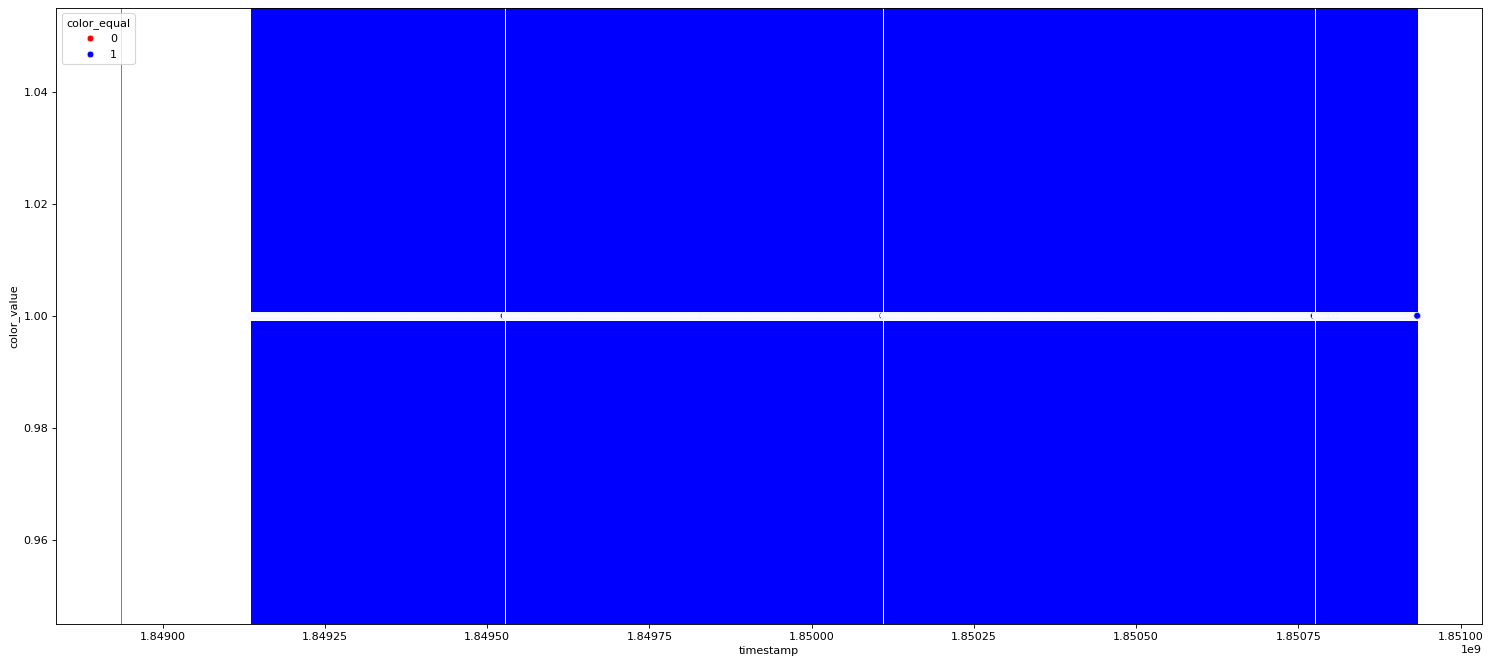

In [16]:
plt.figure(figsize=(23, 10), dpi=80)
ax = plt.gca()

# for value in data_in[data_in['color_value'] > -1]['timestamp']:
#     ax.axvline(value, color='blue', linewidth='0.5')

# for value in data_in[data_in['color_equal'] == 0]['timestamp']:
#     ax.axvline(value, color='red', linewidth='1')

# for value in data_in_app[data_in_app['event_type'] == 'render_stop']['timestamp']:
#     ax.axvline(value, color='orange', linewidth='1')

palette = {1: 'blue', 0: 'red'}
plot = sns.lineplot(data=data_in[data_in['color_value'] > 0], x='timestamp', y='color_value', marker='o', color='blue')
#sns.scatterplot(data=data_in[data_in['color_value'] > 0], x='timestamp', y='color_value', marker='o', hue='color_equal', palette=palette, zorder=2)

#sns.scatterplot(data=data_in_app[data_in_app['color_value'] > 0], x='timestamp', y='color_value', marker='o', hue='event_type')